In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.impute import SimpleImputer

In [6]:
import python_code.Reference as ref

In [7]:
snap07 = pd.read_spss('./data/qc_pub_fy2007.sav')

In [8]:
snap07.head(5)

,FSAFIL1,FSAFIL2,FSAFIL3,FSAFIL4,FSAFIL5,FSAFIL6,FSAFIL7,FSAFIL8,FSAFIL9,FSAFIL10,...,NDISCA7,NDISCA8,NDISCA9,NDISCA10,NDISCA11,NDISCA12,NDISCA13,NDISCA14,NDISCA15,NDISCA16
0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
snap07.shape

(47469, 769)

In [10]:
snap07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47469 entries, 0 to 47468
Columns: 769 entries, FSAFIL1 to NDISCA16
dtypes: float64(769)
memory usage: 278.5 MB


In [11]:
snap07.isnull().sum()

FSAFIL1         0
FSAFIL2     20739
FSAFIL3     29470
FSAFIL4     36884
FSAFIL5     42301
            ...  
NDISCA12    47455
NDISCA13    47463
NDISCA14    47466
NDISCA15    47469
NDISCA16    47469
Length: 769, dtype: int64

In [12]:
snap17 = pd.read_csv('./data/qc_pub_fy2017.csv')

In [13]:
snap17.head(5)

,FSAFIL1,FSAFIL2,FSAFIL3,FSAFIL4,FSAFIL5,FSAFIL6,FSAFIL7,FSAFIL8,FSAFIL9,FSAFIL10,...,WORK12,WORK13,WORK14,WORK15,WORK16,FSNONCIT,FSDIS,FSELDER,FSKID,STATENAME
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,1,0,0,Connecticut
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,Connecticut
2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,Connecticut
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,1,0,0,Connecticut
4,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,1,0,Connecticut


In [14]:
snap17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45530 entries, 0 to 45529
Columns: 814 entries, FSAFIL1 to STATENAME
dtypes: float64(368), int64(445), object(1)
memory usage: 282.8+ MB


In [15]:
snap17.isnull().sum()

FSAFIL1          0
FSAFIL2      22368
FSAFIL3      30458
FSAFIL4      36350
FSAFIL5      40801
             ...  
FSNONCIT         0
FSDIS            0
FSELDER          0
FSKID            0
STATENAME        0
Length: 814, dtype: int64

In [16]:
# 2007: 1 = Eligible, 2 = Not eligible 
snap07['CAT_ELIG'].value_counts()

CAT_ELIG
2.0    25134
1.0    22335
Name: count, dtype: int64

In [17]:
# 2017: 0 = Not eligible, 1 = Reported eligible, 2 = Recorded eligible
snap17['CAT_ELIG'].value_counts()

CAT_ELIG
1    36223
0     7012
2     2295
Name: count, dtype: int64

In [18]:
snap07['CAT_ELIG'] = snap07['CAT_ELIG'].replace(2,0)
snap17['CAT_ELIG'] = snap17['CAT_ELIG'].replace(2,1)

In [19]:
snap07['CAT_ELIG'].value_counts()

CAT_ELIG
0.0    25134
1.0    22335
Name: count, dtype: int64

In [20]:
snap17['CAT_ELIG'].value_counts()

CAT_ELIG
1    38518
0     7012
Name: count, dtype: int64

In [21]:
print(f'2017 dataset: {snap17.shape} VS 2007 dataset: {snap07.shape}')

2017 dataset: (45530, 814) VS 2007 dataset: (47469, 769)


In [22]:
# save New Mexico records 
nm07 = snap07.loc[snap07['STATE'] == 35].astype('float64')
nm07_target = nm07['CAT_ELIG']
nm07.to_csv('./data/nm07.csv', index=None)

In [23]:
nm17 = snap17.loc[snap17['STATE'] == 35]
nm17_target = nm17['CAT_ELIG']
nm17 = nm17.drop(columns = ['STATENAME'])
nm17 = nm17.astype('float64')
nm17.to_csv('./data/nm17.csv', index=None)

In [24]:
#New Mexico dataframe 
df_nm07 = pd.read_csv('./data/nm07.csv')
df_nm07

,FSAFIL1,FSAFIL2,FSAFIL3,FSAFIL4,FSAFIL5,FSAFIL6,FSAFIL7,FSAFIL8,FSAFIL9,FSAFIL10,...,NDISCA7,NDISCA8,NDISCA9,NDISCA10,NDISCA11,NDISCA12,NDISCA13,NDISCA14,NDISCA15,NDISCA16
0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1251,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1252,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1253,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df_nm17 = pd.read_csv('./data/nm17.csv')
df_nm17

,FSAFIL1,FSAFIL2,FSAFIL3,FSAFIL4,FSAFIL5,FSAFIL6,FSAFIL7,FSAFIL8,FSAFIL9,FSAFIL10,...,WORK11,WORK12,WORK13,WORK14,WORK15,WORK16,FSNONCIT,FSDIS,FSELDER,FSKID
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0
2,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
960,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
961,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
962,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0


In [26]:
df_nm07['CAT_ELIG'].value_counts()

CAT_ELIG
0.0    813
1.0    442
Name: count, dtype: int64

In [27]:
df_nm17['CAT_ELIG'].value_counts()

CAT_ELIG
1.0    964
Name: count, dtype: int64

In [28]:
# Save Nebraska records
ne07 = snap07.loc[snap07['STATE'] == 31].astype('float64')
ne07_target = ne07['CAT_ELIG'] 
ne07.to_csv('./data/ne07.csv', index=None)

In [29]:
ne17 = snap17.loc[snap17['STATE'] == 31] 
ne17_target = ne17['CAT_ELIG']
ne17 = ne17.drop(columns = ['STATENAME'])
ne17 = ne17.astype('float64')
ne17.to_csv('./data/ne17.csv', index=None)

In [30]:
#Nebraska dataframe 
df_ne07 = pd.read_csv('./data/ne07.csv')
df_ne07

,FSAFIL1,FSAFIL2,FSAFIL3,FSAFIL4,FSAFIL5,FSAFIL6,FSAFIL7,FSAFIL8,FSAFIL9,FSAFIL10,...,NDISCA7,NDISCA8,NDISCA9,NDISCA10,NDISCA11,NDISCA12,NDISCA13,NDISCA14,NDISCA15,NDISCA16
0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
787,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
788,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
789,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df_ne17 = pd.read_csv('./data/ne17.csv')
df_ne17

,FSAFIL1,FSAFIL2,FSAFIL3,FSAFIL4,FSAFIL5,FSAFIL6,FSAFIL7,FSAFIL8,FSAFIL9,FSAFIL10,...,WORK11,WORK12,WORK13,WORK14,WORK15,WORK16,FSNONCIT,FSDIS,FSELDER,FSKID
0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
4,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
890,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
891,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0
892,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0


In [32]:
df_ne07['CAT_ELIG'].value_counts()

CAT_ELIG
0.0    505
1.0    286
Name: count, dtype: int64

In [33]:
df_ne17['CAT_ELIG'].value_counts()

CAT_ELIG
1.0    894
Name: count, dtype: int64

In [34]:
import python_code.Py_Scripts as sc

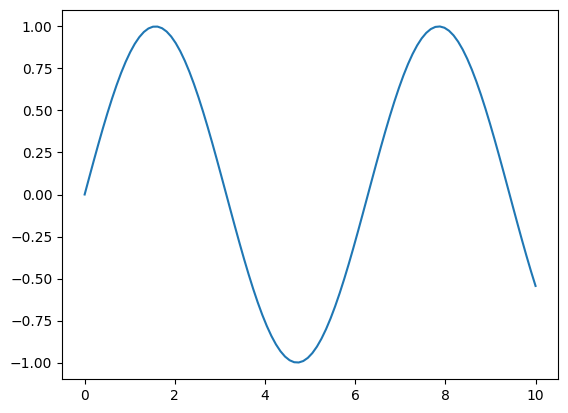

In [35]:
   import matplotlib.pyplot as plt
   import numpy as np
   
   x = np.linspace(0, 10, 100)
   y = np.sin(x)
   
   plt.plot(x, y)
   plt.show()

In [36]:
import importlib
importlib.reload(sc)


<module 'python_code.Py_Scripts' from 'C:\\Users\\User\\Desktop\\SNAP\\python_code\\Py_Scripts\\__init__.py'>

In [37]:
import python_code.Py_Scripts as sc


In [38]:
pip install scanpy

Note: you may need to restart the kernel to use updated packages.


In [39]:
import scanpy as sp

In [40]:
dir(sp.pl)

['DotPlot',
 'MatrixPlot',
 'StackedViolin',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_anndata',
 '_baseplot_class',
 '_docs',
 '_dotplot',
 '_matrixplot',
 '_preprocessing',
 '_qc',
 '_rcmod',
 '_scrublet',
 '_stacked_violin',
 '_tools',
 '_utils',
 'annotations',
 'clustermap',
 'correlation_matrix',
 'dendrogram',
 'diffmap',
 'dotplot',
 'dpt_groups_pseudotime',
 'dpt_timeseries',
 'draw_graph',
 'embedding',
 'embedding_density',
 'filter_genes_dispersion',
 'heatmap',
 'highest_expr_genes',
 'highly_variable_genes',
 'matrix',
 'matrixplot',
 'paga',
 'paga_adjacency',
 'paga_compare',
 'paga_path',
 'palettes',
 'pca',
 'pca_loadings',
 'pca_overview',
 'pca_scatter',
 'pca_variance_ratio',
 'rank_genes_groups',
 'rank_genes_groups_dotplot',
 'rank_genes_groups_heatmap',
 'rank_genes_groups_matrixplot',
 'rank_genes_groups_stacked_violin',
 'rank_genes_groups_tracksplot',
 'rank_g

In [41]:
import python_code.Py_Scripts as sc

In [42]:
dir(sc.plot_simple_features)

AttributeError: module 'python_code.Py_Scripts' has no attribute 'plot_simple_features'

In [ ]:
sc.plot_simple_features('FSNELDER','elderly', 'Number of Elderly(over age 60)')

In [ ]:
sc.plot_simple_features('FSNELDER', 'elderly', 'Number of Elderly(over age 60)')

In [ ]:
import python_code.Scripts as sc

In [ ]:
sc.plot_simple_features('FSNELDER', 'elderly', 'Number of Elderly (over age of 60)')

In [ ]:
import importlib
import python_code.Py_Scripts as sc
importlib.reload(sc)


In [ ]:
sc.plot_simple_features('FSNELDER', 'elderly', 'Number of Elderly (over age of 60)')


In [ ]:
class SimplePlotter:
    def plot_simple_features(self, table_name, column, title):
        ...


In [ ]:
from python_code.Py_Scripts import plot_simple_features


In [ ]:
import python_code.Py_Scripts
print(dir(python_code.Py_Scripts))

In [ ]:
import python_code.Py_Scripts as sc
print(dir(sc))
